In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df=pd.read_csv("Customer Segmentation.csv")

In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
df.shape

(200, 5)

In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
X=df[['Age','Spending Score (1-100)']].values

In [11]:
X

array([[19, 39],
       [21, 81],
       [20,  6],
       [23, 77],
       [31, 40],
       [22, 76],
       [35,  6],
       [23, 94],
       [64,  3],
       [30, 72],
       [67, 14],
       [35, 99],
       [58, 15],
       [24, 77],
       [37, 13],
       [22, 79],
       [35, 35],
       [20, 66],
       [52, 29],
       [35, 98],
       [35, 35],
       [25, 73],
       [46,  5],
       [31, 73],
       [54, 14],
       [29, 82],
       [45, 32],
       [35, 61],
       [40, 31],
       [23, 87],
       [60,  4],
       [21, 73],
       [53,  4],
       [18, 92],
       [49, 14],
       [21, 81],
       [42, 17],
       [30, 73],
       [36, 26],
       [20, 75],
       [65, 35],
       [24, 92],
       [48, 36],
       [31, 61],
       [49, 28],
       [24, 65],
       [50, 55],
       [27, 47],
       [29, 42],
       [31, 42],
       [49, 52],
       [33, 60],
       [31, 54],
       [59, 60],
       [50, 45],
       [47, 41],
       [51, 50],
       [69, 46],
       [27, 51

In [12]:
from sklearn.cluster import KMeans

In [14]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

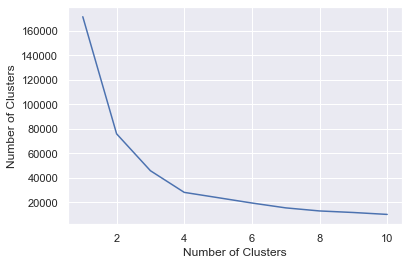

In [15]:
sns.set()
plt.plot(range(1,11),wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('Number of Clusters')
plt.show()

In [16]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

In [17]:
y=kmeans.fit_predict(X)

In [18]:
y

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2])

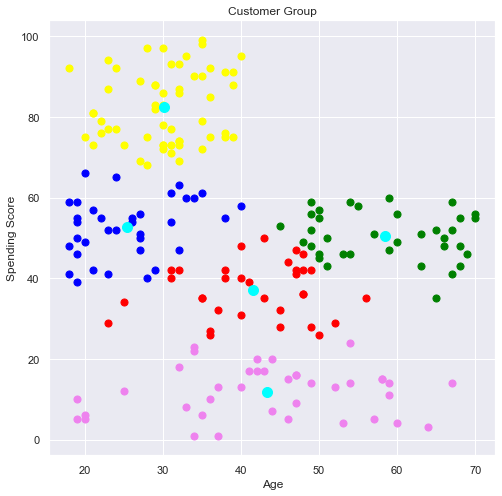

In [22]:
#visualization of cluster
plt.figure(figsize=(8,8))
plt.scatter(X[y==0,0],X[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(X[y==1,0],X[y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(X[y==2,0],X[y==2,1],s=50,c='yellow',label='Cluster 3')
plt.scatter(X[y==3,0],X[y==3,1],s=50,c='blue',label='Cluster 4')
plt.scatter(X[y==4,0],X[y==4,1],s=50,c='violet',label='Cluster 5')

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='Centroids')

plt.title("Customer Group")
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()